In [53]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [54]:
# Read dataset
data = pd.read_csv("breastcancerdata.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [55]:
# Drop ID column and last column with NaN values 
data.drop(data.columns[[-1, 0]], axis=1, inplace=True)  
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

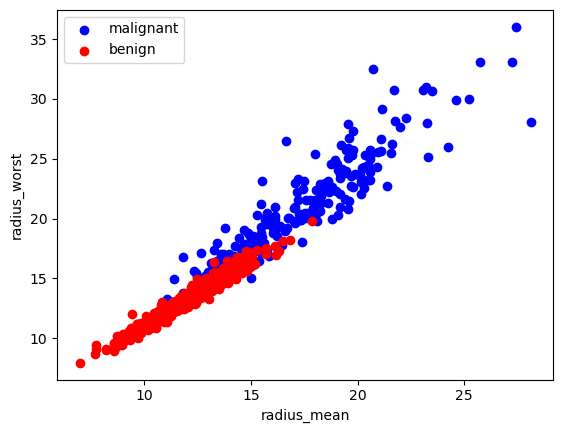

In [56]:
# Displaying a scatterplot of benign vs. malignant using radius_mean vs. radius_worst
M = data[data.diagnosis=="M"]
B = data[data.diagnosis=="B"]
plt.scatter(M.radius_mean,M.radius_worst,color="blue",label="malignant") 
plt.scatter(B.radius_mean,B.radius_worst,color="red",label="benign")
plt.xlabel("radius_mean")
plt.ylabel("radius_worst")
plt.legend()
plt.show()

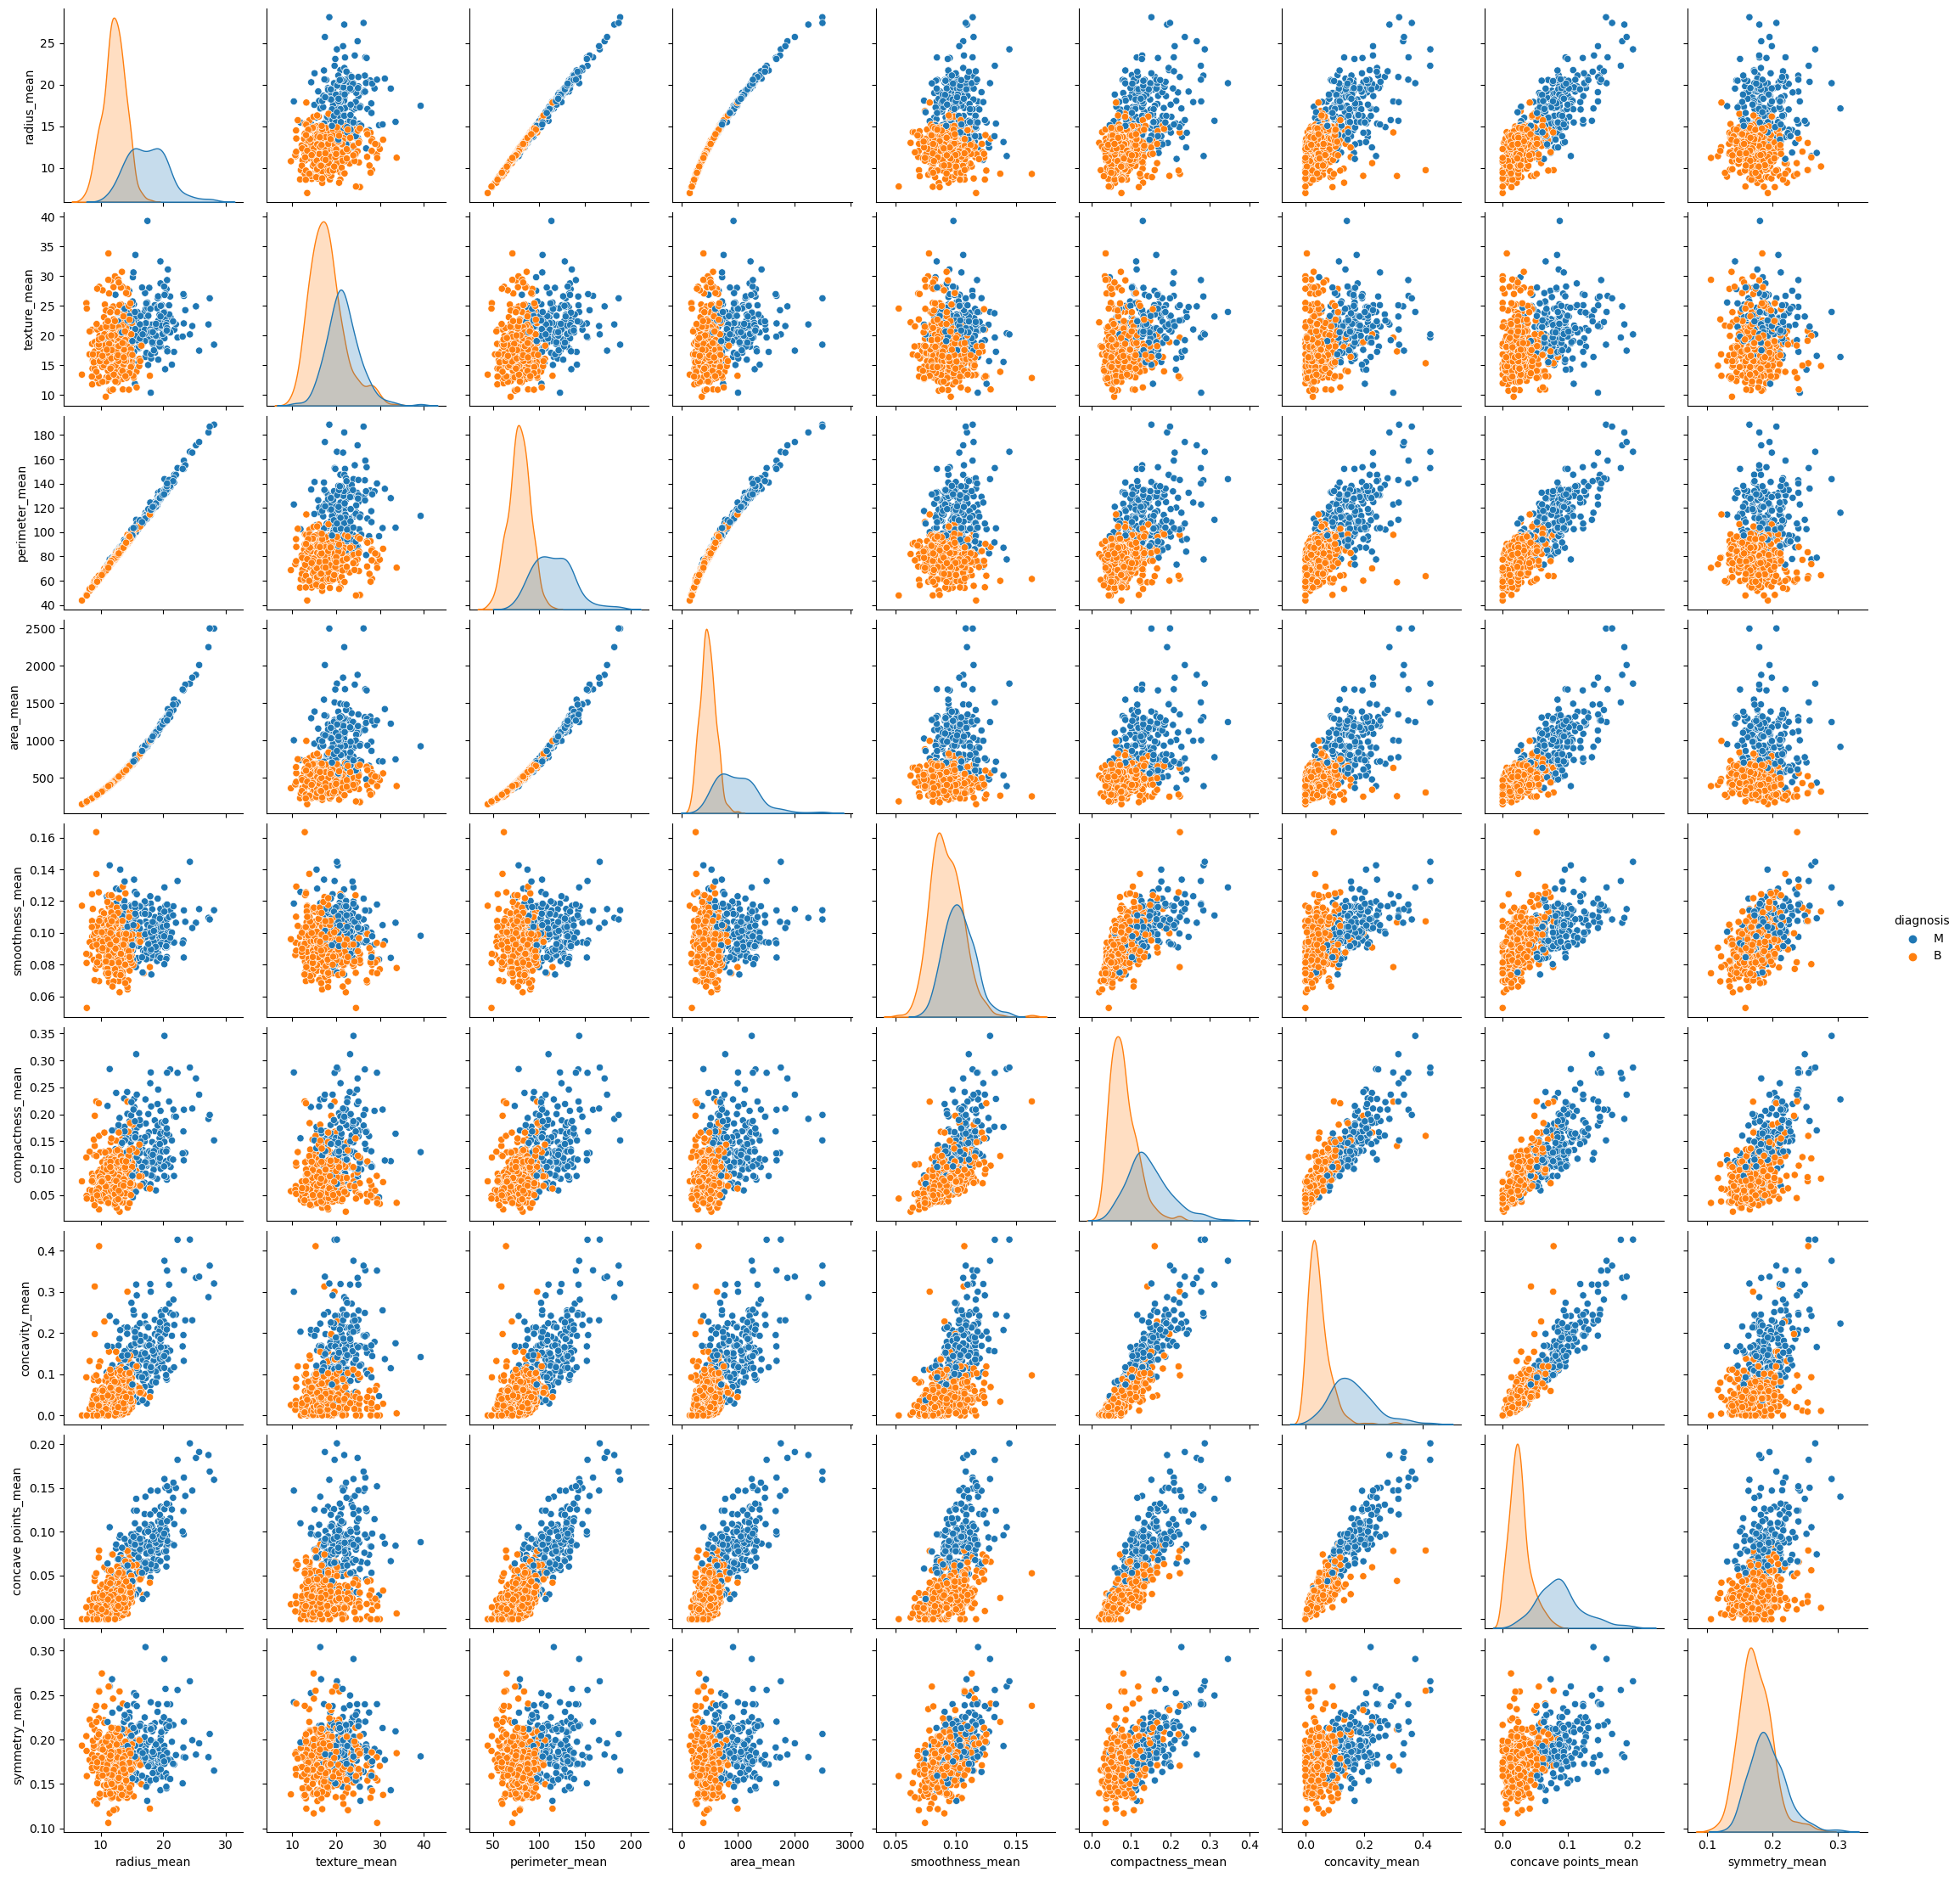

In [57]:
import seaborn as sns
sns.pairplot(data.iloc[:,0:10], hue = 'diagnosis')

The pairplots above show relationships between 2 attributes. 
Based on observation, there are some plots that show a linear relationship between 2 attributes and some that do not. 
Benign cancer datapoints tend to be closer to smaller numbers, while malignant cancer datapoints tend to have higher values for the attributes above. We will apply Support Vector Machine to see if we can classify malignant vs. benign. 

In [58]:
# Separate x and y values
# Malignant -> 1 and Benign -> 0
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['diagnosis']=encoder.fit_transform(data['diagnosis'])

In [59]:
x_values = data.iloc[:, 1:] #all columns after first
y = data['diagnosis']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [60]:
# Normalize the x values such that all variables have same importance
x = (x_values - x_values.min())/(x_values.max()-x_values.min())
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [61]:
# Training data = 80%, Testing data = 20%
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.2)

### SVM algorithm 
Find the hyperplane that separates benign and malignant examples. The SVM model is 
f(x) = w^T * x + b where w is the set of weights and b is the bias term. 
To find the optimal hyperplane, we must maximize the distance between H0 and H1 as well as H1 and H2.
This problem can be solved using the Lagrangian function and Lagrangian function with Kernel if non-linear. 

In [62]:
from sklearn.svm import SVC
svc= SVC(random_state=50)
svc.fit(x_train,y_train)

SVC(random_state=50)

In [63]:
svc.score(x_test,y_test)

0.9824561403508771

In [64]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred =svc.predict(x_test)
print(confusion_matrix(y_test,y_pred))

[[74  0]
 [ 2 38]]


In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        74
           1       1.00      0.95      0.97        40

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114



The SVM model has a precision of 0.97 on identifying benign cancer masses and 1.00 on identifying malignant cancer masses. The model has 0 false positive and 2 false negative. 

### Using GridSearch to find best parameters for SVC

C value is the penalty parameter. 
A smaller C results in wider margin but more misclassified examples. 
A larger C results in smaller margin and less misclassified examples, but more overfitting.

Kernel function is used to transform the data, especially if the data is non-linear. The Kernel function can either be linear, polynomial, rbf, sigmoid, 
or precomputed. The most preferred kernel function is RBF (radial basis function) because it is more flexible and 
can capture the relationships between input and output better.

Gamma is the Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
The hyperparameter gamma is used to tune the function's sensitivity to differences in the feature vector.
If gamma is too large, we may be overfitting the Kernel function. 

In [66]:
# Find optimal parameters using GridSearch
from sklearn.model_selection import GridSearchCV
svc_params = {'C': [0.01, 0.1, 1, 10, 100, 1000],
             'gamma': [10, 1, 0.1, 0.01, 0.001],
             'kernel': ['rbf','poly', 'sigmoid', 'linear']}
svc_search = GridSearchCV(SVC(),svc_params, cv = 5, verbose = 1)
svc_search.fit(x_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [10, 1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
             verbose=1)

In [67]:
svc_search.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [68]:
# See if using this parameter optimizes SVC model 
svc_result = SVC (C = 10, gamma = 0.1, kernel = 'rbf')
svc_result.fit(x_train, y_train)

SVC(C=10, gamma=0.1)

In [69]:
svc_result.score(x_test,y_test)

0.9824561403508771

In [70]:
y_svc_search = svc_result.predict(x_test)
print(confusion_matrix(y_test,y_svc_search))

[[74  0]
 [ 2 38]]


In [71]:
print(classification_report(y_test, y_svc_search))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        74
           1       1.00      0.95      0.97        40

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114



After using GridSearch to find the best parameters for the Support Vector Classifier,
the precision for detecting benign cancer is 0.97 and for detecting malignant cancer is 1.00.
This result is the same as using the default parameters for SVC.